
Training with sigmoid activation function:
Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.8192 - loss: 0.7263 - val_accuracy: 0.9327 - val_loss: 0.2450
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9324 - loss: 0.2355 - val_accuracy: 0.9471 - val_loss: 0.1857
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9489 - loss: 0.1760 - val_accuracy: 0.9570 - val_loss: 0.1526
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9626 - loss: 0.1313 - val_accuracy: 0.9617 - val_loss: 0.1326
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9719 - loss: 0.1048 - val_accuracy: 0.9656 - val_loss: 0.1154

Training with tanh activation function:
Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.8634 - loss: 0.4745 - val_accuracy: 0.9474 - val_loss: 0.1871
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9502 - loss: 0.1711 - val_accuracy: 0.9592 - val_loss: 0.1465
Epoch 3/

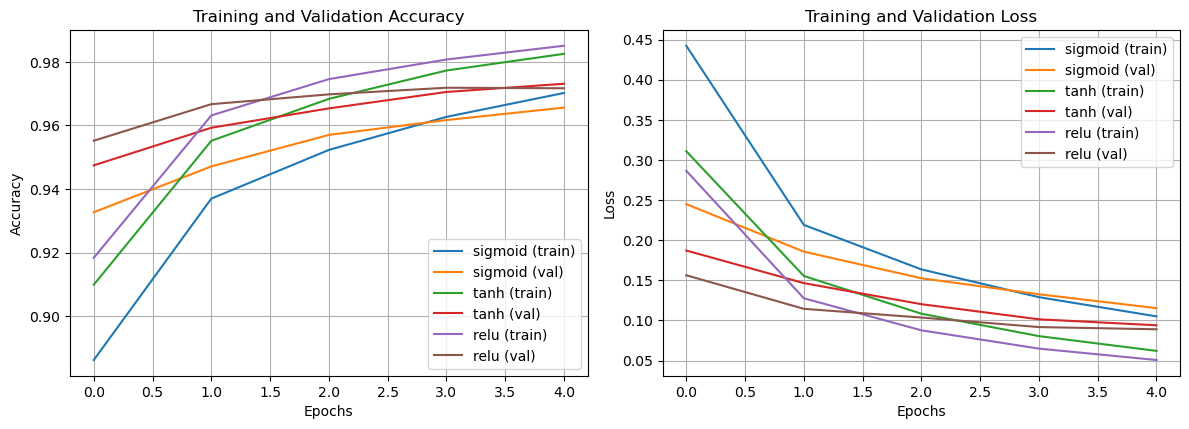

313/313 - 1s - 4ms/step - accuracy: 0.9695 - loss: 0.0999
Test accuracy with sigmoid activation: 0.9695
313/313 - 2s - 7ms/step - accuracy: 0.9750 - loss: 0.0774
Test accuracy with tanh activation: 0.9750
313/313 - 1s - 4ms/step - accuracy: 0.9768 - loss: 0.0703
Test accuracy with relu activation: 0.9768

Test accuracy for each activation function:
sigmoid: 96.9500
tanh: 97.5000
relu: 97.6800


In [3]:
#1
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# Reshape the data to match the input format of a fully connected network
x_train = x_train.reshape((x_train.shape[0], 28 * 28))
x_test = x_test.reshape((x_test.shape[0], 28 * 28))

# Function to create a model with a specific activation function for hidden layers
def create_model(activation_function):
    model = models.Sequential()
    # First layer: Dense layer with chosen activation function (sigmoid, tanh, or relu)
    model.add(layers.Dense(128, activation=activation_function, input_shape=(28 * 28,)))
    # Output layer: Dense layer with softmax activation to output class probabilities
    model.add(layers.Dense(10, activation='softmax'))  # Softmax for the output layer
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Activation functions to compare
activation_functions = ['sigmoid', 'tanh', 'relu']

# Dictionary to store training histories for each activation function
histories = {}

# Train models with each activation function
for activation in activation_functions:
    print(f"\nTraining with {activation} activation function:")
    model = create_model(activation)
    history = model.fit(x_train, y_train, epochs=5, batch_size=32, verbose=1, validation_split=0.2)
    histories[activation] = history

# Plotting training and validation accuracy for each activation function
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
for activation, history in histories.items():
    plt.plot(history.history['accuracy'], label=f'{activation} (train)')
    plt.plot(history.history['val_accuracy'], label=f'{activation} (val)')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

# Plotting training and validation loss for each activation function
plt.subplot(2, 2, 2)
for activation, history in histories.items():
    plt.plot(history.history['loss'], label=f'{activation} (train)')
    plt.plot(history.history['val_loss'], label=f'{activation} (val)')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

# Evaluate models on test set and print the results
results = {}
for activation in activation_functions:
    model = create_model(activation)
    model.fit(x_train, y_train, epochs=5, batch_size=32, verbose=0)  # Retrain each model
    test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
    results[activation] = test_acc
    print(f'Test accuracy with {activation} activation: {test_acc:.4f}')

# Print overall results
print("\nTest accuracy for each activation function:")
for activation, test_acc in results.items():
    print(f'{activation}: {test_acc * 100:.4f}')
